In [543]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_palette("RdBu_r")

In [544]:
raw_train_df=pd.read_csv('Dataset/train.csv')
raw_test_df=pd.read_csv('Dataset/test.csv')

Exploratory Data Analysis

In [545]:
raw_train_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 12 columns]

In [546]:
raw_test_df

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110    Male   25                1         11.0                   1   
1       381111    Male   40                1         28.0                   0   
2       381112    Male   47                1         28.0                   0   
3       381113    Male   24                1         27.0                   1   
4       381114    Male   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142  Female   26                1         37.0                   1   
127033  508143  Female   38                1         28.0                   0   
127034  508144    Male   21                1         46.0                   1   
127035  508145    Male   71                1         28.0                   1   
127036  508146    Male   41                1         29.0                   1   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0         < 1 Year             No         35786.0                 152.0   
1         1-2 Year            Yes         33762.0                   7.0   
2         1-2 Year            Yes         40050.0                 124.0   
3         < 1 Year            Yes         37356.0                 152.0   
4         < 1 Year             No         59097.0                 152.0   
...            ...            ...             ...                   ...   
127032    < 1 Year             No         30867.0                 152.0   
127033    1-2 Year            Yes         28700.0                 122.0   
127034    < 1 Year             No         29802.0                 152.0   
127035    1-2 Year             No         62875.0                  26.0   
127036    1-2 Year             No         27927.0                 124.0   

        Vintage  
0            53  
1           111  
2           199  
3           187  
4           297  
...         ...  
127032       56  
127033      165  
127034       74  
127035      265  
127036      231  

[127037 rows x 11 columns]

In [547]:
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [548]:
raw_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [549]:
raw_train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [550]:
raw_train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [551]:
raw_test_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [552]:
raw_test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [553]:
raw_test_df.nunique()

id                      127037
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           36327
Policy_Sales_Channel       145
Vintage                    290
dtype: int64

In [554]:
raw_train_df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [555]:
raw_train_df.describe(include=['object'])

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

#Vizualization Of Data

In [556]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Gender',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Gender and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

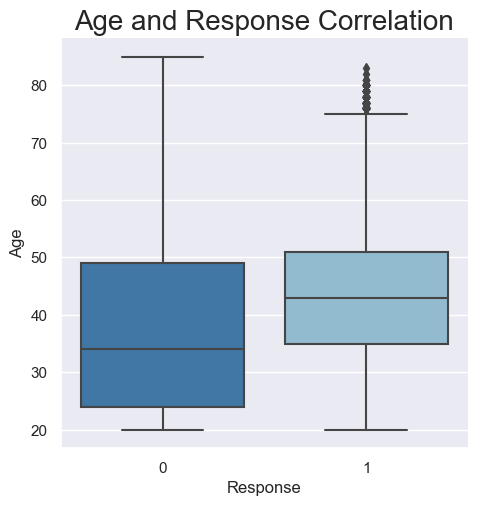

In [557]:
sns.catplot(x="Response",y="Age", data=raw_train_df, kind='box')
plt.title("Age and Response Correlation", size=20, y=1.0);

In [558]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Driving_License',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Driving License and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Region code and Response Correlation')

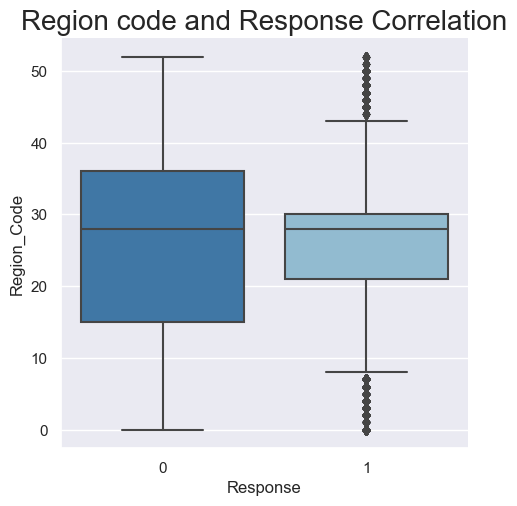

In [559]:
sns.catplot(x="Response", y="Region_Code", data=raw_train_df, kind="box")
plt.title("Region code and Response Correlation", size=20, y=1.0)

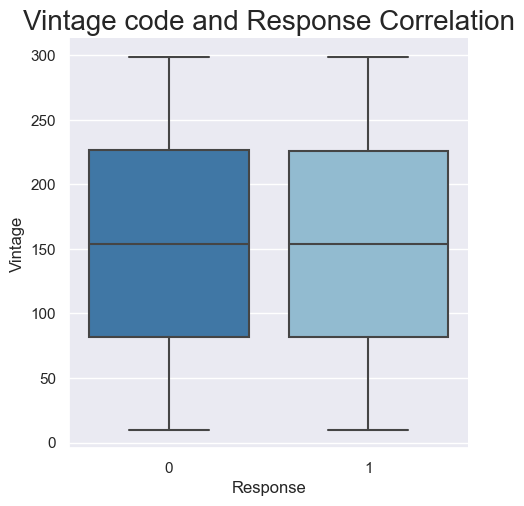

In [560]:
sns.catplot(x="Response", y="Vintage", data=raw_train_df, kind="box")
plt.title("Vintage code and Response Correlation", size=20, y=1.0);

In [561]:
fig=px.histogram(raw_train_df,
                x='Response',
                marginal='box',
                color='Vehicle_Damage',
                color_discrete_sequence=['#6666FF', '#FF99FF'],
                title='Vehicle_Damage and Response Correlation'
                )
fig.update_layout(bargap=0.1)
fig.show()

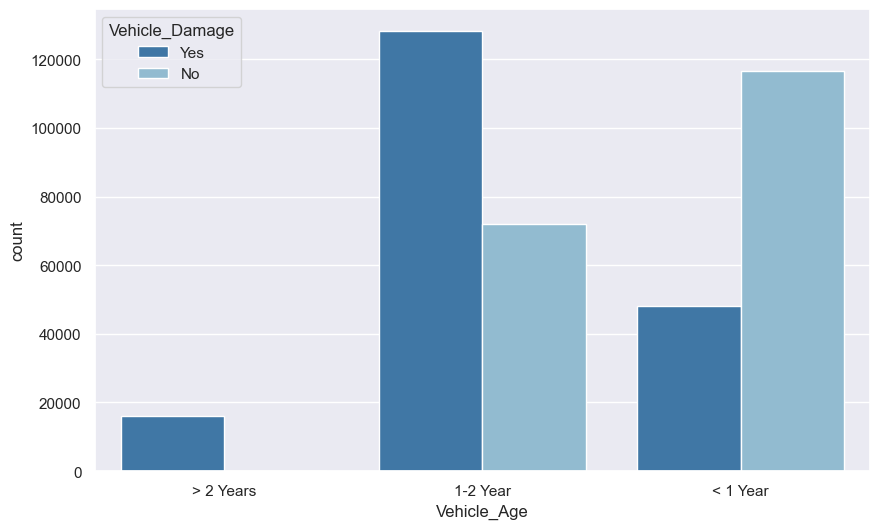

In [562]:
sns.countplot(data=raw_train_df,x='Vehicle_Age',hue='Vehicle_Damage');

In [563]:
corr_data=raw_train_df.drop(['id'], inplace=False, axis=1)

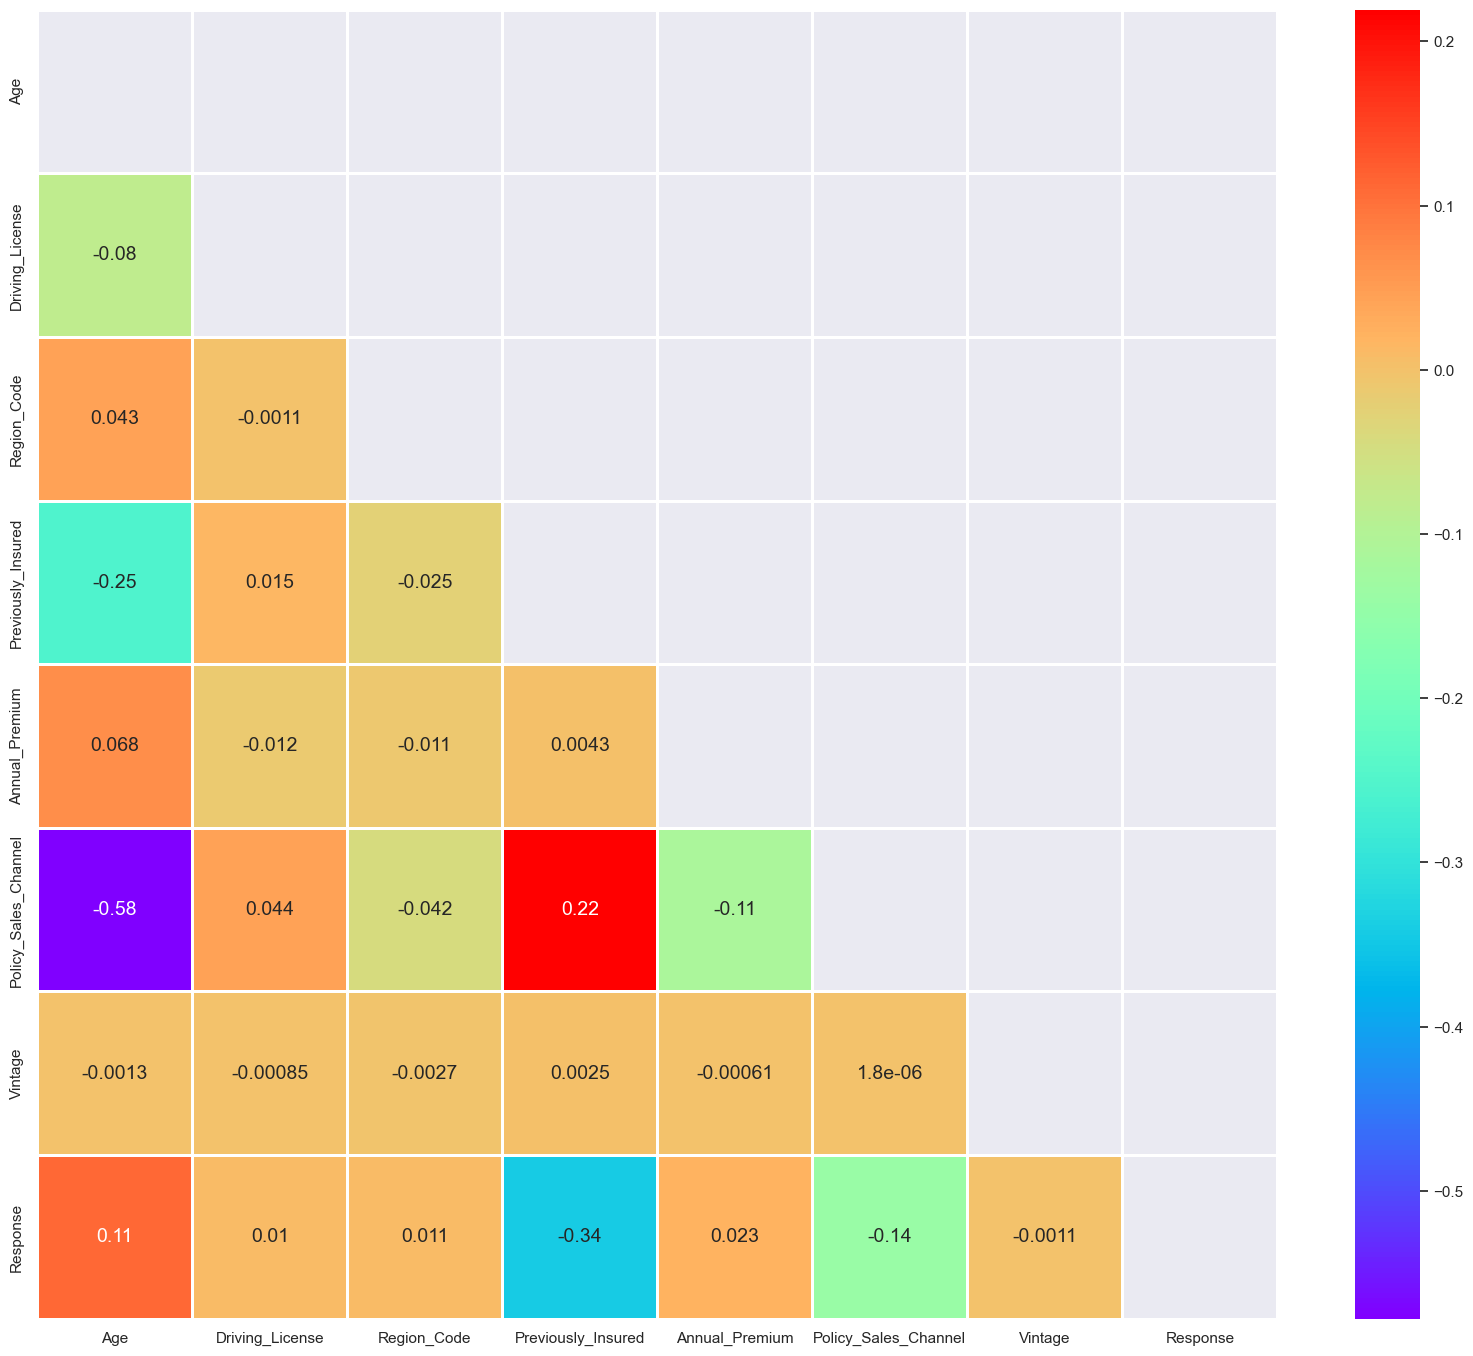

In [564]:
plt.figure(figsize=(20, 17))
matrix = np.triu(corr_data.corr())
sns.heatmap(corr_data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rainbow");

Data Preprocessing

In [565]:
raw_train_df.drop("id", inplace=True, axis=1)
raw_test_df.drop("id",inplace=True, axis=1)

In [566]:
raw_train_df['Gender']=raw_train_df['Gender'].replace({'Male':1,'Female':0})
raw_train_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0       1   44                1         28.0                   0   > 2 Years   
1       1   76                1          3.0                   0    1-2 Year   
2       1   47                1         28.0                   0   > 2 Years   
3       1   21                1         11.0                   1    < 1 Year   
4       0   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0            Yes         40454.0                  26.0      217         1  
1             No         33536.0                  26.0      183         0  
2            Yes         38294.0                  26.0       27         1  
3             No         28619.0                 152.0      203         0  
4             No         27496.0                 152.0       39         0

In [567]:
raw_train_df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [568]:
raw_train_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_train_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)
raw_train_df.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            3   
1       1   76                1          3.0                   0            2   
2       1   47                1         28.0                   0            3   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                  26.0      217         1  
1               0         33536.0                  26.0      183         0  
2               1         38294.0                  26.0       27         1  
3               0         28619.0                 152.0      203         0  
4               0         27496.0                 152.0       39         0

In [569]:
train_df=raw_train_df

<AxesSubplot:>

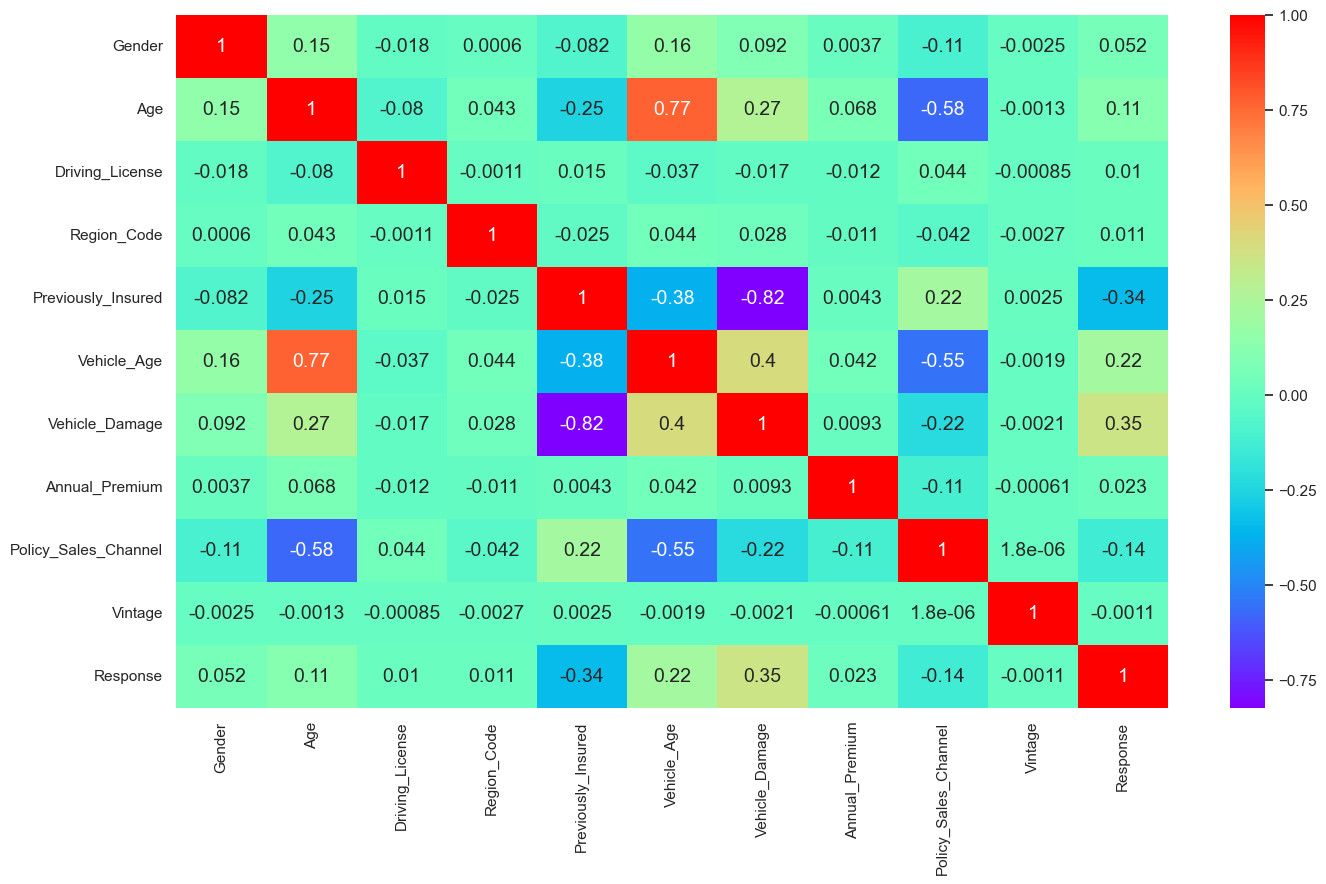

In [570]:
plt.figure(figsize=(16,9))
sns.heatmap(train_df.corr(),  cmap="rainbow", annot=True)

In [571]:
hig_corr = train_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Response"]) >= 0.2]
hig_corr_features

Index(['Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response'], dtype='object')

In [572]:
raw_test_df['Gender']=raw_test_df['Gender'].replace({'Male':1,'Female':0})

In [573]:
raw_test_df['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
raw_test_df['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [574]:
test_df=raw_test_df
test_df

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1   25                1         11.0                   1   
1            1   40                1         28.0                   0   
2            1   47                1         28.0                   0   
3            1   24                1         27.0                   1   
4            1   27                1         28.0                   1   
...        ...  ...              ...          ...                 ...   
127032       0   26                1         37.0                   1   
127033       0   38                1         28.0                   0   
127034       1   21                1         46.0                   1   
127035       1   71                1         28.0                   1   
127036       1   41                1         29.0                   1   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0                 1               0         35786.0                 152.0   
1                 2               1         33762.0                   7.0   
2                 2               1         40050.0                 124.0   
3                 1               1         37356.0                 152.0   
4                 1               0         59097.0                 152.0   
...             ...             ...             ...                   ...   
127032            1               0         30867.0                 152.0   
127033            2               1         28700.0                 122.0   
127034            1               0         29802.0                 152.0   
127035            2               0         62875.0                  26.0   
127036            2               0         27927.0                 124.0   

        Vintage  
0            53  
1           111  
2           199  
3           187  
4           297  
...         ...  
127032       56  
127033      165  
127034       74  
127035      265  
127036      231  

[127037 rows x 10 columns]

Scaling Numeric Data

In [575]:
numeric_cols=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [576]:
from sklearn.preprocessing import MinMaxScaler

In [577]:
scaler=MinMaxScaler()

In [578]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [579]:
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

In [580]:
train_df.describe().loc[['min', 'max']]

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0  0.0              0.0          0.0                 0.0   
max     1.0  1.0              1.0          1.0                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0             0.0                   0.0   
max          3.0             1.0             1.0                   1.0   

     Vintage  Response  
min      0.0       0.0  
max      1.0       1.0

In [581]:
test_df.describe().loc[['min', 'max']]

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
min     0.0  0.0              0.0          0.0                 0.0   
max     1.0  1.0              1.0          1.0                 1.0   

     Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
min          1.0             0.0        0.000000                   0.0   
max          3.0             1.0        0.873268                   1.0   

     Vintage  
min      0.0  
max      1.0

In [582]:
train_df.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.369231                1     0.538462                   0   
1       1  0.861538                1     0.057692                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.015385                1     0.211538                   1   
4       0  0.138462                1     0.788462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0            3               1        0.070366              0.154321   
1            2               0        0.057496              0.154321   
2            3               1        0.066347              0.154321   
3            1               0        0.048348              0.932099   
4            1               0        0.046259              0.932099   

    Vintage  Response  
0  0.716263         1  
1  0.598616         0  
2  0.058824         1  
3  0.667820         0  
4  0.100346         0

In [583]:
test_df.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
0       1  0.076923                1     0.211538                   1   
1       1  0.307692                1     0.538462                   0   
2       1  0.415385                1     0.538462                   0   
3       1  0.061538                1     0.519231                   1   
4       1  0.107692                1     0.538462                   1   

   Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel   Vintage  
0            1               0        0.061682              0.932099  0.148789  
1            2               1        0.057916              0.037037  0.349481  
2            2               1        0.069614              0.759259  0.653979  
3            1               1        0.064602              0.932099  0.612457  
4            1               0        0.105048              0.932099  0.993080

Training, Validation and Text Data

In [584]:
input_cols=list(train_df.columns)[0:-1]
target_col='Response'

In [585]:
inputs=train_df[input_cols]
targets=train_df[target_col]

In [586]:
from sklearn.model_selection import train_test_split

In [587]:
train_inputs, val_inputs, train_targets,val_targets=train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [588]:
val_inputs.head()

Gender       Age  Driving_License  Region_Code  Previously_Insured  \
200222       0  0.015385                1     0.057692                   1   
49766        1  0.538462                1     0.288462                   0   
172201       0  0.323077                1     0.057692                   0   
160713       0  0.092308                1     0.211538                   0   
53272        1  0.476923                1     0.769231                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
200222            1               0        0.033073              0.981481   
49766             2               1        0.064866              0.154321   
172201            2               1        0.000000              0.154321   
160713            1               0        0.000000              0.925926   
53272             2               1        0.058370              0.759259   

         Vintage  
200222  0.214533  
49766   0.318339  
172201  0.276817  
160713  0.892734  
53272   0.882353

In [589]:
len(val_inputs)

76222

In [590]:
len(val_targets)

76222

Logistic Regression Model

In [591]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [592]:
model=LogisticRegression(solver='liblinear')

In [593]:
model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [594]:
%%time
train_preds=model.predict(train_inputs)
train_probs=model.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds)

CPU times: user 89 ms, sys: 26.7 ms, total: 116 ms
Wall time: 21.8 ms


0.8779154244031395

In [595]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets,name=''):
    preds=model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 87.79%
CPU times: user 192 ms, sys: 47.9 ms, total: 240 ms
Wall time: 78.7 ms


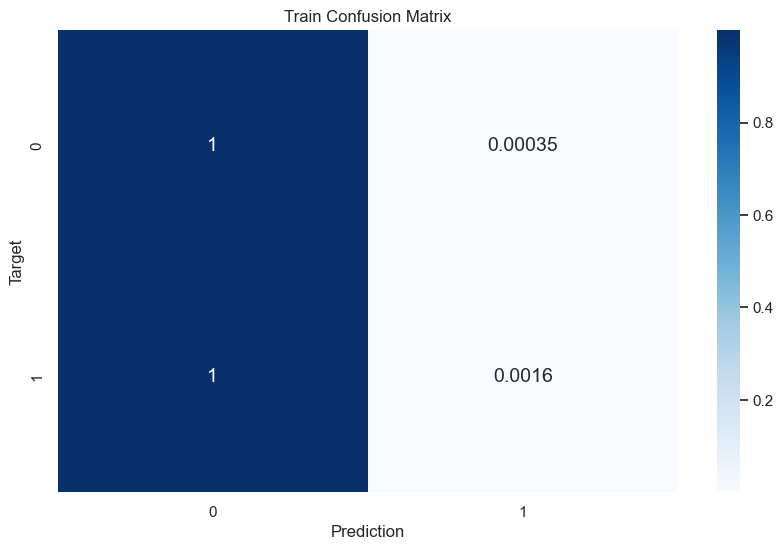

In [596]:
%%time
train_preds=predict_and_plot(train_inputs, train_targets,'Train')

Accuracy: 87.50%
CPU times: user 195 ms, sys: 57.8 ms, total: 253 ms
Wall time: 39.1 ms


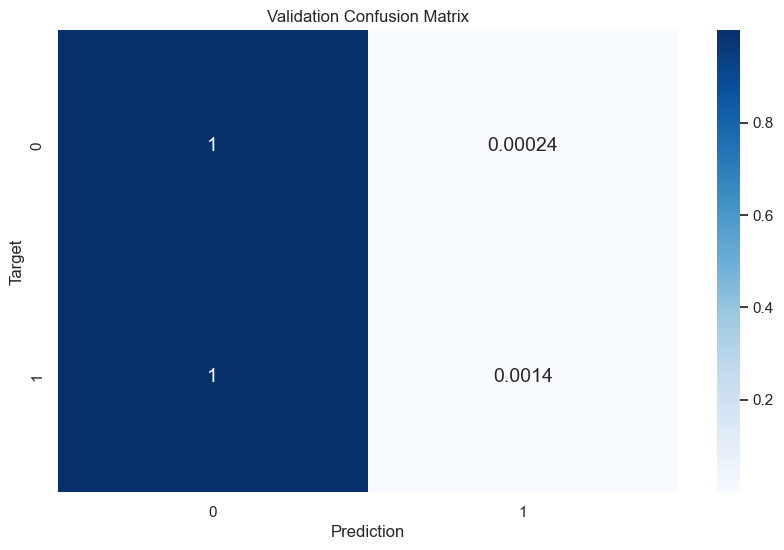

In [597]:
%%time
val_preds=predict_and_plot(val_inputs, val_targets,'Validation')

Random Forest Classifier

In [598]:
from sklearn.ensemble import RandomForestClassifier

In [599]:
model_2=RandomForestClassifier(n_jobs=-1, random_state=42)

In [600]:
model_2.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [601]:
%%time
model_2.score(train_inputs, train_targets)

CPU times: user 6.53 s, sys: 187 ms, total: 6.72 s
Wall time: 1.15 s


0.9998622440445148

In [602]:
from sklearn.metrics import confusion_matrix
def predict_and_plot_2(inputs, targets,name=''):
    preds=model_2.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 86.50%
CPU times: user 1.8 s, sys: 37.1 ms, total: 1.84 s
Wall time: 338 ms


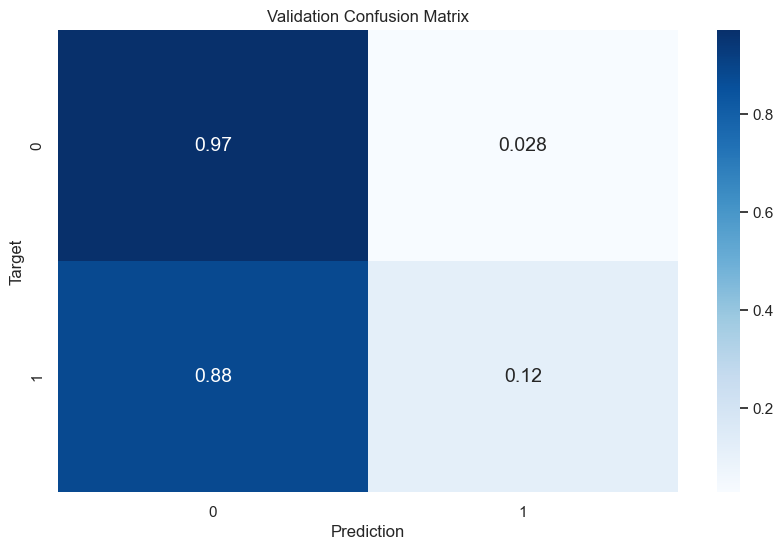

In [603]:
%%time
val_preds_2 = predict_and_plot_2(val_inputs, val_targets, 'Validation')

In [604]:
model_2_all = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=100,
                               max_features=6)

In [605]:
model_2_all.fit(train_inputs,train_targets)
print("Training Accuracy = ",model_2_all.score(train_inputs, train_targets))
print("Validation Accuracy = ",model_2_all.score(val_inputs, val_targets)) 

Training Accuracy =  0.9998556842371108
Validation Accuracy =  0.8651832804177272


Decision Tree Classifier

In [606]:
from sklearn.tree import DecisionTreeClassifier

In [607]:
model_3=DecisionTreeClassifier(random_state=42)

In [608]:
model_3.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [609]:
%%time
train_preds_3=model_3.predict(train_inputs)
train_probs_3=model_3.predict_proba(train_inputs)
accuracy_score(train_targets, train_preds_3)

CPU times: user 126 ms, sys: 4.02 ms, total: 130 ms
Wall time: 142 ms


0.9998852033704291

In [610]:
def predict_and_plot_3(inputs, targets, name=''):
    preds = model_3.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap="Blues")
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 86.50%
CPU times: user 1.84 s, sys: 121 ms, total: 1.96 s
Wall time: 375 ms


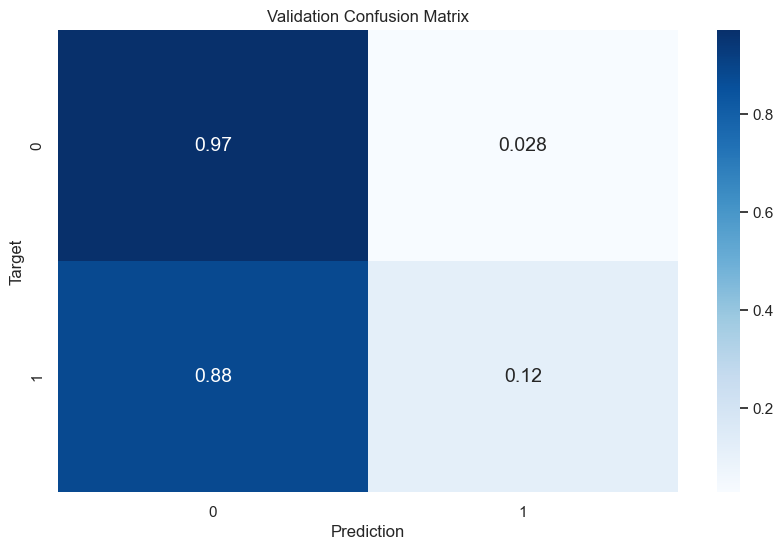

In [611]:
%%time
val_preds = predict_and_plot_2(val_inputs, val_targets, 'Validation')

In [612]:
from sklearn.tree import plot_tree, export_text

[Text(0.5, 0.9, 'Vehicle_Damage <= 0.5\ngini = 0.214\nsamples = 304887\nvalue = [267700, 37187]'),
 Text(0.25, 0.7, 'Previously_Insured <= 0.5\ngini = 0.01\nsamples = 150950\nvalue = [150165, 785]'),
 Text(0.125, 0.5, 'Policy_Sales_Channel <= 0.935\ngini = 0.073\nsamples = 19130\nvalue = [18405, 725]'),
 Text(0.0625, 0.3, 'Age <= 0.608\ngini = 0.059\nsamples = 16165\nvalue = [15676, 489]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Policy_Sales_Channel <= 0.972\ngini = 0.147\nsamples = 2965\nvalue = [2729, 236]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age <= 0.192\ngini = 0.001\nsamples = 131820\nvalue = [131760, 60]'),
 Text(0.3125, 0.3, 'Region_Code <= 0.048\ngini = 0.001\nsamples = 84849\nvalue = [84826, 23]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'Policy_Sales_Channel <= 0.941\ngini = 0.002\nsamples = 46971\nvalue =

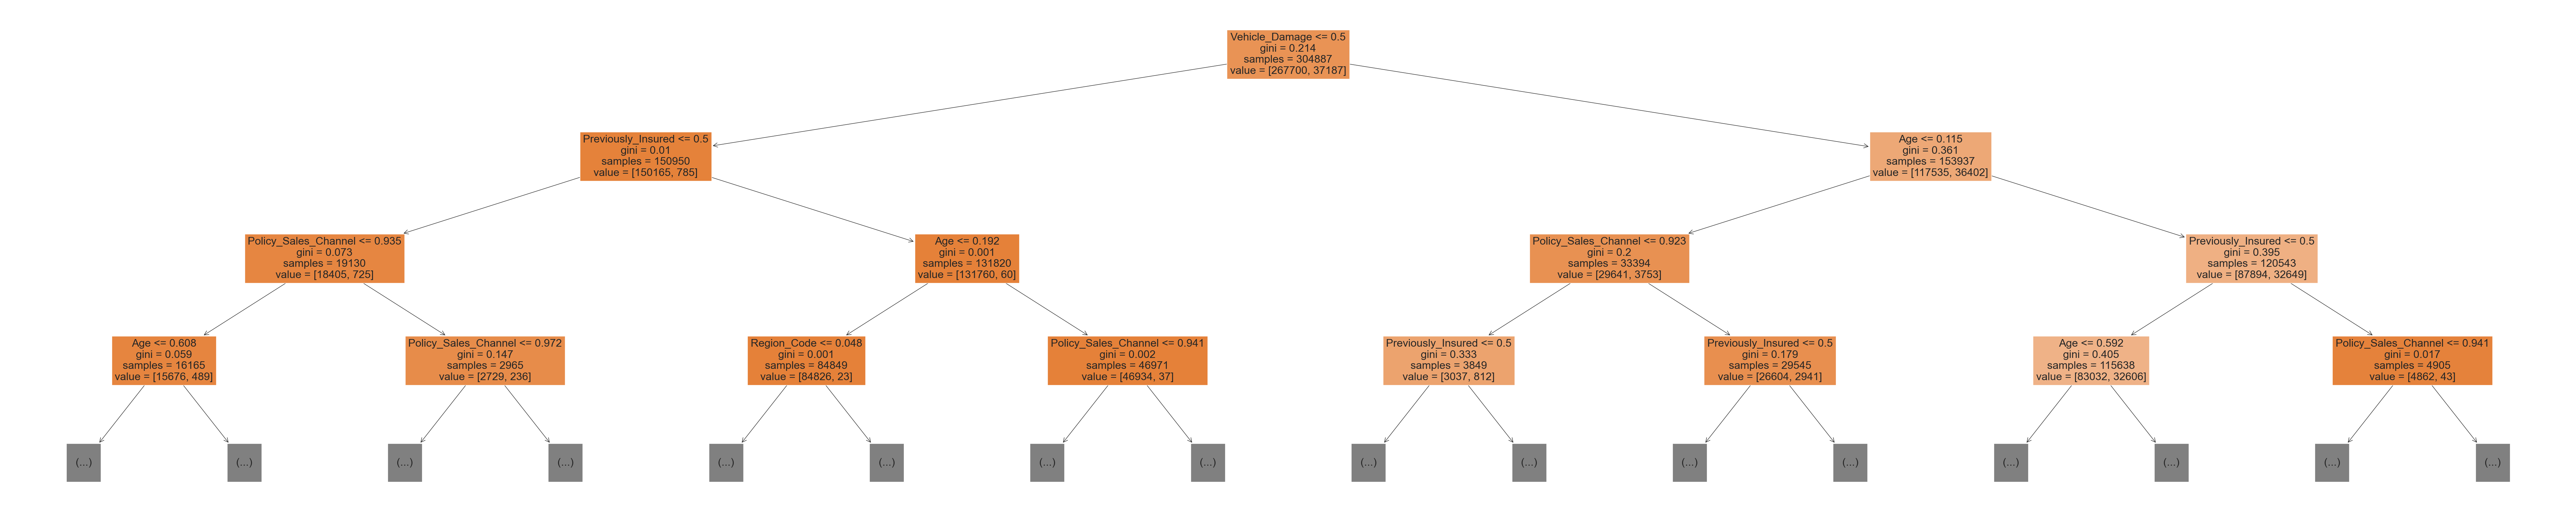

In [613]:
plt.figure(figsize=(100,20))
plot_tree(model_3, feature_names=train_inputs.columns, max_depth=3, filled=True)

In [614]:
model_3_text=export_text(model_3, feature_names=list(train_inputs.columns))
print(model_3_text[:3000])

|--- Vehicle_Damage <= 0.50
|   |--- Previously_Insured <= 0.50
|   |   |--- Policy_Sales_Channel <= 0.94
|   |   |   |--- Age <= 0.61
|   |   |   |   |--- Policy_Sales_Channel <= 0.92
|   |   |   |   |   |--- Age <= 0.30
|   |   |   |   |   |   |--- Policy_Sales_Channel <= 0.75
|   |   |   |   |   |   |   |--- Region_Code <= 0.99
|   |   |   |   |   |   |   |   |--- Annual_Premium <= 0.20
|   |   |   |   |   |   |   |   |   |--- Age <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= 0.90
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  0.90
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  0.05
|   |   |   |   |   |   |   |   |   |   |--- Vintage <= 0.71
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- Vintage >  0.71
|   |   |   |   |   |   |   |   |   |   |   

In [615]:
model_3.feature_importances_

array([0.02497463, 0.13148203, 0.00057645, 0.10268734, 0.01257527,
       0.00940411, 0.12491632, 0.27135783, 0.04471703, 0.277309  ])

In [616]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_3.feature_importances_
}).sort_values('importance', ascending=False)

In [617]:
importance_df

feature  importance
9               Vintage    0.277309
7        Annual_Premium    0.271358
1                   Age    0.131482
6        Vehicle_Damage    0.124916
3           Region_Code    0.102687
8  Policy_Sales_Channel    0.044717
0                Gender    0.024975
4    Previously_Insured    0.012575
5           Vehicle_Age    0.009404
2       Driving_License    0.000576